In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
def stepFunc(x):
  if x>=0:
    return 1
  return -1

In [81]:
class Perceptron:
  def __init__(self,n,actFunc):
    self.activationFunction=actFunc
    self.w=np.zeros(n)
    self.bias=1
    self.itr=[]
    self.err=[]

  def learnBoolean(self,dataset,learningRate):
    count=0
    while(True):
      flag=True
      for i,row in dataset.iterrows():
        count=count+1
        x=np.array(row[:-1])
        y=row[-1]
        print("x1,x2 = ",x,"target = ",y)
        predicted = self.predict(x)
        print("predicted = ",predicted)
        if predicted!=y:
          flag = False
          self.w += learningRate*self.deltaW(x,y,predicted)
          self.bias += learningRate*(y-predicted)
          #print("w = ",self.w,"bias = ",self.bias)
        if count not in self.itr:
          self.itr.append(count)
          self.err.append(abs(y-predicted))

      if (flag == True): 
        break
    
    print("w = ",self.w," bias = ",self.bias," count = ",count)
    return count

  def plotIE(self):
    f,p = plt.subplots()
    p.plot(self.itr,self.err)
    p.set(xlabel = "Iterations", ylabel = "Error")
    p.set_title("Itr Vs Err")

  def plotLI(self,lr,itr):
    f,p = plt.subplots()
    p.plot(lr,itr)
    p.set(xlabel="LR",ylabel="itr")
    p.set_title("LR Vs Itr")

  def predict(self,x):
    a = np.dot(self.w,x) + self.bias
    return self.activationFunction(a)

  def deltaW(self,x,y,p):
    return (y-p)*x

In [46]:
dataAND = pd.DataFrame({'x1':[-1,-1,1,1],'x2':[-1,1,-1,1],'o':[-1,-1,-1,1]})
dataAND

,x1,x2,o
0,-1,-1,-1
1,-1,1,-1
2,1,-1,-1
3,1,1,1


In [67]:
pAND = Perceptron(len(dataAND.columns)-1,stepFunc)
count = pAND.learnBoolean(dataAND,0.01)

x1,x2 =  [-1 -1] target =  -1
predicted =  1
x1,x2 =  [-1  1] target =  -1
predicted =  -1
x1,x2 =  [ 1 -1] target =  -1
predicted =  -1
x1,x2 =  [1 1] target =  1
predicted =  1
x1,x2 =  [-1 -1] target =  -1
predicted =  -1
x1,x2 =  [-1  1] target =  -1
predicted =  -1
x1,x2 =  [ 1 -1] target =  -1
predicted =  -1
x1,x2 =  [1 1] target =  1
predicted =  1
w =  [0.02 0.02]  bias =  -0.02  count =  8


x1,x2 =  [-1 -1] target =  -1
predicted =  1
x1,x2 =  [-1  1] target =  -1
predicted =  1
x1,x2 =  [ 1 -1] target =  -1
predicted =  1
x1,x2 =  [1 1] target =  1
predicted =  1
x1,x2 =  [-1 -1] target =  -1
predicted =  1
x1,x2 =  [-1  1] target =  -1
predicted =  1
x1,x2 =  [ 1 -1] target =  -1
predicted =  1
x1,x2 =  [1 1] target =  1
predicted =  1
x1,x2 =  [-1 -1] target =  -1
predicted =  -1
x1,x2 =  [-1  1] target =  -1
predicted =  -1
x1,x2 =  [ 1 -1] target =  -1
predicted =  -1
x1,x2 =  [1 1] target =  1
predicted =  1
w =  [0.4 0.4]  bias =  -0.19999999999999996  count =  12
x1,x2 =  [-1 -1] target =  -1
predicted =  -1
x1,x2 =  [-1  1] target =  -1
predicted =  -1
x1,x2 =  [ 1 -1] target =  -1
predicted =  -1
x1,x2 =  [1 1] target =  1
predicted =  1
w =  [0.4 0.4]  bias =  -0.19999999999999996  count =  4
x1,x2 =  [-1 -1] target =  -1
predicted =  -1
x1,x2 =  [-1  1] target =  -1
predicted =  -1
x1,x2 =  [ 1 -1] target =  -1
predicted =  -1
x1,x2 =  [1 1] target =  1
predic

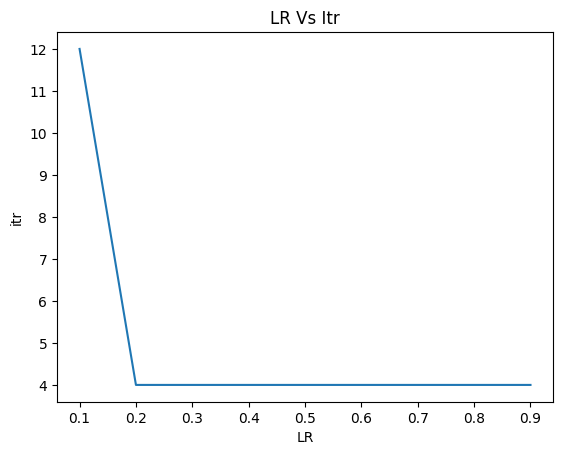

In [84]:
lr = np.arange(0.1,1,0.1)
y=[]
pAND= Perceptron(len(dataAND.columns)-1,stepFunc)
for i in lr:
  count = pAND.learnBoolean(dataAND,i)
  y.append(count)
print(lr)
print(y)
pAND.plotLI(lr,y)

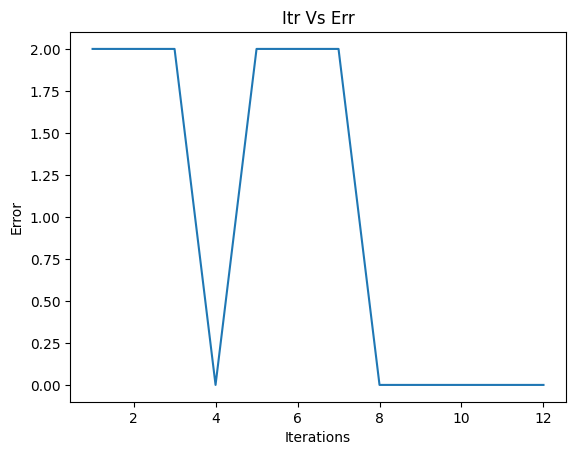

In [85]:
pAND.plotIE()